In [1]:
import pandas as pd
import os

In [2]:
topic = 'atheism'
scheme = 'NNPred'

path = os.getcwd()
clean_path = f'{path}/clean/multiclass'
NN_path = f'{path}/NN/multiclass/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_NNtrain.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

#path_nn_model= f'{pathNN}/{topic}/{scheme}'
#os.makedirs(path_nn_model, exist_ok=True)
NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/multiclass/atheism/NNPred'

In [3]:
train = pd.read_csv(train_file)
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,NNAgainst,NNFavor,NNPred
0,1.344430e+18,Is Belief in God a Delusion? - Neuroscience Ne...,-1,Against,1,Favor,0.943809,0.056191,-1
1,1.344427e+18,"I haven’t even been on twitter for a week, I h...",0,Uknown,1,Favor,0.805741,0.194259,-1
2,1.344426e+18,The Crabs are LIVE RIGHT NOW--&gt; URL,0,Uknown,0,Uknown,0.820663,0.179337,-1
3,1.344422e+18,Watching people feel devotional by bathing the...,-1,Against,0,Uknown,0.918980,0.081020,-1
4,1.344420e+18,Some of the benefits of Christianity cited by ...,0,Uknown,0,Uknown,0.876998,0.123002,-1


In [4]:
train = train[[f'{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']
train.head()

,Label,Tweet
0,-1,Is Belief in God a Delusion? - Neuroscience Ne...
1,-1,"I haven’t even been on twitter for a week, I h..."
2,-1,The Crabs are LIVE RIGHT NOW--&gt; URL
3,-1,Watching people feel devotional by bathing the...
4,-1,Some of the benefits of Christianity cited by ...


In [5]:
train.Label.unique()

array([-1,  1,  0])

In [6]:
train.groupby('Label').count()

,Tweet
Label,
-1,7678
0,3614
1,6400


In [7]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [8]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [9]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'NONE':0})
test.Stance.unique()

array([-1,  1,  0])

In [10]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,464
0,145
1,124


In [11]:
train.shape, test.shape

((17692, 2), (733, 2))

# clean data

In [12]:
import sys
sys.path.insert(0, '/media/rinnely/Archer/ENES/Stance')
import cleandata as cd

In [13]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [14]:
train = train.dropna(axis=0)

# Token

In [ ]:
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [ ]:
tokenized_train = train['Tweet'].apply(lambda x: x.split())
tokenized_test = test['Tweet'].apply(lambda x: x.split())
tokenized_test

In [ ]:
tokenized_train = tokenized_train.apply(lambda x:[item for item in x if 
                                    item not in stop_words]) 
tokenized_test = tokenized_test.apply(lambda x:[item for item in x if 
                                    item not in stop_words]) 
tokenized_test

In [ ]:
train['detokens'] = tokenized_train.apply(lambda x: ' '.join(x))
test['detokens'] = tokenized_test.apply(lambda x: ' '.join(x))
train

# save data

In [15]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

# read data

In [16]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

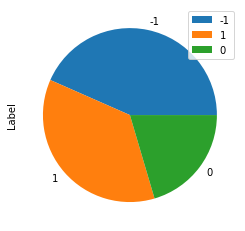

In [17]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

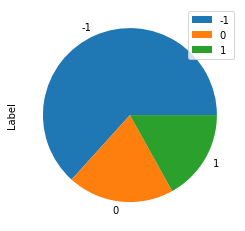

In [18]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

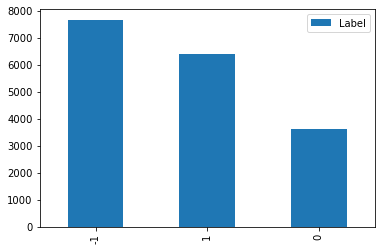

In [19]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

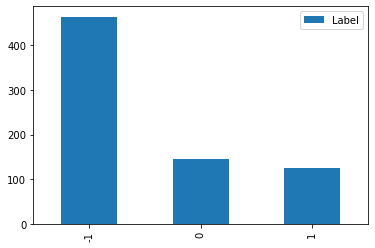

In [20]:
test['Label'].value_counts().plot.bar(legend=True)

In [21]:
train

,Label,Tweet
0,-1,Is Belief in God a Delusion? - Neuroscience Ne...
1,-1,"I haven’t even been on twitter for a week, I h..."
2,-1,The Crabs are LIVE RIGHT NOW--&gt; URL
3,-1,Watching people feel devotional by bathing the...
4,-1,Some of the benefits of Christianity cited by ...
...,...,...
17687,-1,"Sam Harris Net Worth – $2,500,000 URL URL"
17688,0,"Yay!!!!! Jack Van Impe, an Apocalyptic Televan..."
17689,1,The New York Public Library Has Calculated Its...
17690,1,Being a Humanist means trying to behave decent...


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17692 entries, 0 to 17691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   17692 non-null  int64 
 1   Tweet   17692 non-null  object
dtypes: int64(1), object(1)
memory usage: 276.6+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   733 non-null    int64 
 1   Tweet   733 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [24]:
train = train.dropna(axis=0)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17692 entries, 0 to 17691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   17692 non-null  int64 
 1   Tweet   17692 non-null  object
dtypes: int64(1), object(1)
memory usage: 414.7+ KB


# Training

In [26]:
from fastai.text import *

In [27]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.2)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
data_lm.show_batch()

In [28]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

In [ ]:
f'data_clas{topic}_{scheme}'

In [ ]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [29]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=1.)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 4.37E-02


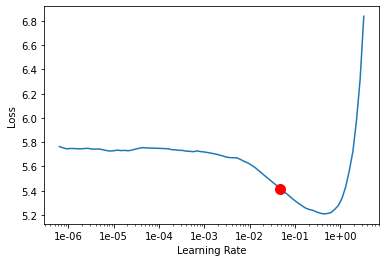

In [30]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [31]:
learn_lm.fit_one_cycle(5,4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.951696,3.993703,0.297794,00:35
1,4.093414,3.537718,0.342831,00:35
2,3.781321,3.427025,0.357606,00:36
3,3.624113,3.384901,0.364002,00:36
4,3.578722,3.378796,0.365573,00:36


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 1.32E-03


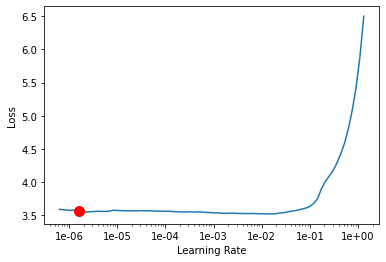

In [32]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [33]:
learn_lm.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,3.465617,3.246981,0.383851,00:50
1,3.284013,3.149124,0.400687,00:49
2,3.181974,3.133370,0.403572,00:49


In [34]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [35]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [36]:
learn_lm.save(f'{topic}_model_v1')

In [37]:
learn_lm.load(f'{topic}_model_v1');

In [38]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=1.)

In [39]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1),labels=[0,2], average='macro')

In [40]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [41]:
learn.save('learner-1stage')

In [42]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-03
Min loss divided by 10: 3.02E-02


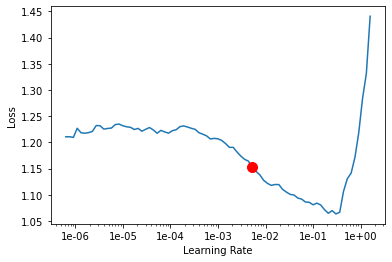

In [43]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [45]:
learn.fit_one_cycle(5,5e-3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.898103,0.834646,0.424416,00:26
1,0.903283,0.876176,0.446065,00:30
2,0.883674,0.852256,0.468905,00:27
3,0.865716,0.846554,0.520962,00:27
4,0.849260,0.838288,0.508954,00:28


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [46]:
learn.save('learner-2stage')

In [47]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-06


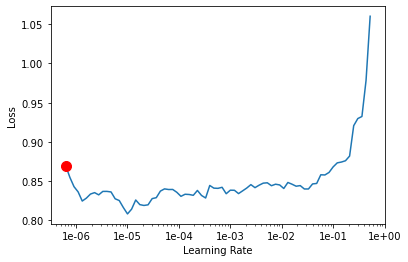

In [48]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [49]:
learn.fit_one_cycle(3,5e-7, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.858839,0.839455,0.516145,00:29
1,0.853261,0.839011,0.517816,00:28
2,0.812715,0.845144,0.509269,00:26


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [50]:
learn.save('learner-3stage')

In [64]:
learn.load('learner-3stage');

In [ ]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(5,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 1.58E-03


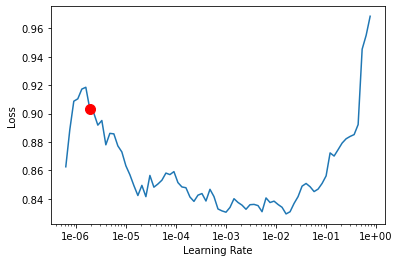

In [65]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [66]:
learn.fit_one_cycle(3,moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time
0,0.852069,0.862030,0.511816,00:35
1,0.818237,0.841375,0.557598,00:35
2,0.815074,0.869785,0.514904,00:33


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [68]:
learn.save('learner-freeze2')
learn.load('learner-freeze2');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 1.58E-03


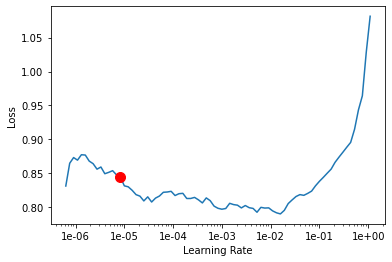

In [71]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [72]:
learn.fit_one_cycle(3,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.787720,0.879964,0.502216,01:02
1,0.738059,0.896086,0.534830,01:02
2,0.741817,0.907414,0.520652,00:58


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


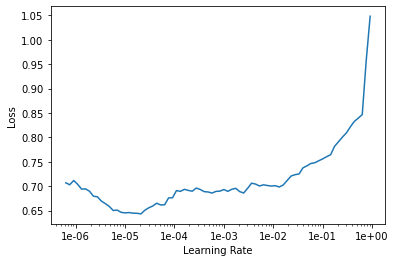

In [56]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [57]:
learn.fit_one_cycle(3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.679126,0.985257,0.524382,01:18
1,0.602208,1.043498,0.525032,01:22
2,0.580202,1.109505,0.512952,01:18


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [75]:
learn.save('learner-unfreeze')

In [76]:
learn.load('learner-unfreeze');

In [73]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

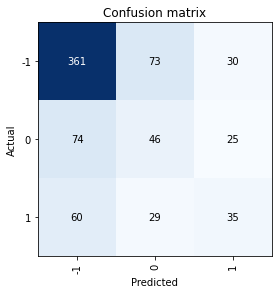

In [74]:
interp.plot_confusion_matrix()

In [62]:
preds

tensor([[0.9123, 0.0813, 0.0064],
        [0.4158, 0.5124, 0.0718],
        [0.7757, 0.2174, 0.0069],
        ...,
        [0.9947, 0.0038, 0.0015],
        [0.4323, 0.4210, 0.1467],
        [0.0855, 0.3389, 0.5757]])

In [77]:
learn.save('learner-final')